# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as py
import seaborn as sb

import charset_normalizer 
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity

# Load Data

In [2]:
anime = pd.read_csv('/kaggle/input/anime-recommendations-database/anime.csv').set_index('anime_id')
anime

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...
9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
5543,Under World,Hentai,OVA,1,4.28,183
5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219


In [3]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12294 entries, 32281 to 26081
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      12294 non-null  object 
 1   genre     12232 non-null  object 
 2   type      12269 non-null  object 
 3   episodes  12294 non-null  object 
 4   rating    12064 non-null  float64
 5   members   12294 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 672.3+ KB


In [4]:
anime.isnull().sum()

name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [5]:
anime.name[anime.name.duplicated()]

anime_id
30059           Saru Kani Gassen
33195    Shi Wan Ge Leng Xiaohua
Name: name, dtype: object

In [6]:
anime[anime.name == 'Saru Kani Gassen']

,name,genre,type,episodes,rating,members
anime_id,,,,,,
22399,Saru Kani Gassen,Kids,OVA,1,5.23,62
30059,Saru Kani Gassen,Drama,Movie,1,4.75,76


In [7]:
anime[anime.name == 'Shi Wan Ge Leng Xiaohua']

,name,genre,type,episodes,rating,members
anime_id,,,,,,
33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12,6.67,114
33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


In [8]:
anime.loc[28977]

name                                                 Gintama°
genre       Action, Comedy, Historical, Parody, Samurai, S...
type                                                       TV
episodes                                                   51
rating                                                   9.25
members                                                114262
Name: 28977, dtype: object

In [9]:
anime.loc[9969]

name                                            Gintama&#039;
genre       Action, Comedy, Historical, Parody, Samurai, S...
type                                                       TV
episodes                                                   51
rating                                                   9.16
members                                                151266
Name: 9969, dtype: object

In [10]:
anime.loc[6133]

name        Violence Gekiga Shin David no Hoshi: Inma Dens...
genre                                                  Hentai
type                                                      OVA
episodes                                                    1
rating                                                   4.98
members                                                   175
Name: 6133, dtype: object

In [11]:
anime.loc[5621]

name        Violence Gekiga David no Hoshi
genre                               Hentai
type                                   OVA
episodes                                 4
rating                                4.88
members                                219
Name: 5621, dtype: object

In [4]:
animes_genre = anime.genre.copy()
animes_genre

anime_id
32281                 Drama, Romance, School, Supernatural
5114     Action, Adventure, Drama, Fantasy, Magic, Mili...
28977    Action, Comedy, Historical, Parody, Samurai, S...
9253                                      Sci-Fi, Thriller
9969     Action, Comedy, Historical, Parody, Samurai, S...
                               ...                        
9316                                                Hentai
5543                                                Hentai
5621                                                Hentai
6133                                                Hentai
26081                                               Hentai
Name: genre, Length: 12294, dtype: object

In [13]:
anime[animes_genre.isnull()]

,name,genre,type,episodes,rating,members
anime_id,,,,,,
33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
33589,ViVid Strike!,NaN,TV,12,6.96,12345
29765,Metropolis (2009),NaN,Movie,1,6.27,313
32695,Match Shoujo,NaN,ONA,1,6.02,242
33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...
32032,Seikaisuru Kado,NaN,NaN,Unknown,NaN,1797
34310,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,NaN,Movie,1,NaN,51
34474,Tsukipro The Animation,NaN,TV,Unknown,NaN,843


In [14]:
animes_genre.value_counts()

Hentai                                                  823
Comedy                                                  523
Music                                                   301
Kids                                                    199
Comedy, Slice of Life                                   179
                                                       ... 
Adventure, Drama, Fantasy, Game, Sci-Fi                   1
Adventure, Demons, Fantasy, Historical                    1
Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen      1
Action, Comedy, Fantasy, Mecha, Sci-Fi, Shounen           1
Hentai, Slice of Life                                     1
Name: genre, Length: 3264, dtype: int64

In [8]:
def handle_genre(genre_series=anime.genre.copy()):
    genres = []
    for genre in genre_series:
        genres.extend(str(genre).strip()\
                      .replace(', ', ',').replace(' ,', ',').upper().split(','))
        pass
    genres = np.unique(genres)
    print(f"Number of Unique \033[1mGenres\033[0m is {len(genres)}")
    
    data_frame = pd.DataFrame(columns=genres, index= genre_series.index).fillna(0)
    
    for ind in genre_series.index:
        for gen in str(genre_series.loc[ind]).strip()\
                      .replace(', ', ',').replace(' ,', ',').upper().split(','): 
            data_frame.loc[ind][gen] = 1
            pass
        pass
    return data_frame

In [4]:
genres = handle_genre()
genres.head(5)

Number of Unique Genres is 44


,ACTION,ADVENTURE,CARS,COMEDY,DEMENTIA,DEMONS,DRAMA,ECCHI,FANTASY,GAME,...,SHOUNEN AI,SLICE OF LIFE,SPACE,SPORTS,SUPER POWER,SUPERNATURAL,THRILLER,VAMPIRE,YAOI,YURI
anime_id,,,,,,,,,,,,,,,,,,,,,
32281,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5114,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
28977,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9969,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
temp = pd.DataFrame(data=[(genres.columns[i], genres.iloc[:,i].value_counts().iloc[-1]) for i in range(44)]).set_index(0)
temp.sort_values(by=1, ascending=False)

,1
0,
COMEDY,4645
ACTION,2845
ADVENTURE,2348
FANTASY,2309
SCI-FI,2070
DRAMA,2016
SHOUNEN,1711
KIDS,1609
ROMANCE,1464


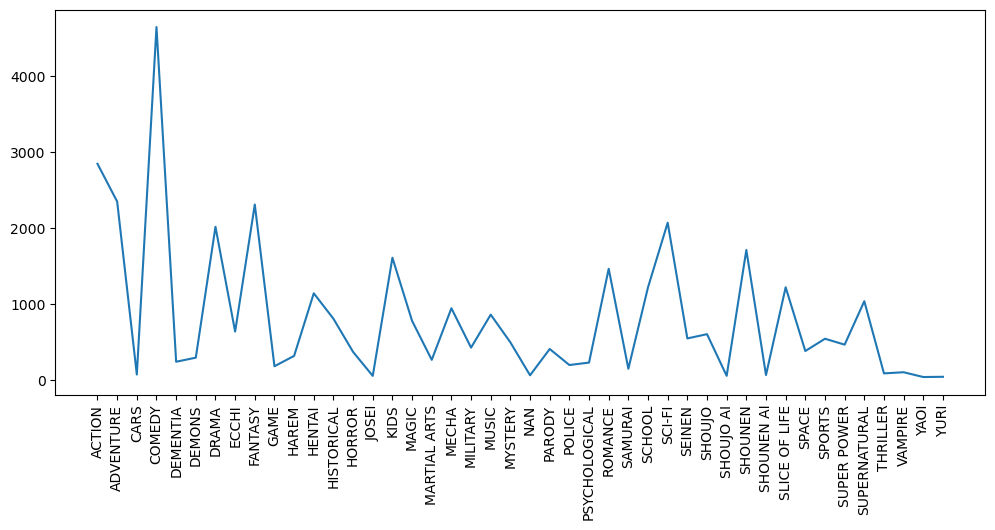

In [18]:
py.figure(figsize=(12,5))
py.plot(temp)
py.xticks(rotation=90); py.show()

<AxesSubplot:xlabel='type', ylabel='count'>

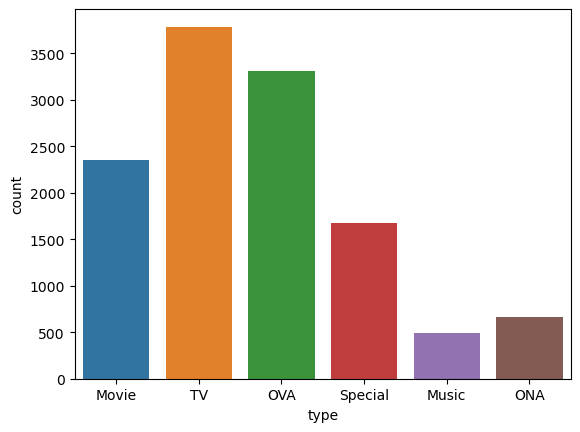

In [19]:
sb.countplot(x=anime.type)

In [20]:
temp = pd.concat([anime.type,  genres], axis=1)
temp.head(4)

,type,ACTION,ADVENTURE,CARS,COMEDY,DEMENTIA,DEMONS,DRAMA,ECCHI,FANTASY,...,SHOUNEN AI,SLICE OF LIFE,SPACE,SPORTS,SUPER POWER,SUPERNATURAL,THRILLER,VAMPIRE,YAOI,YURI
anime_id,,,,,,,,,,,,,,,,,,,,,
32281,Movie,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5114,TV,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
28977,TV,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9253,TV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:xlabel='type', ylabel='count'>

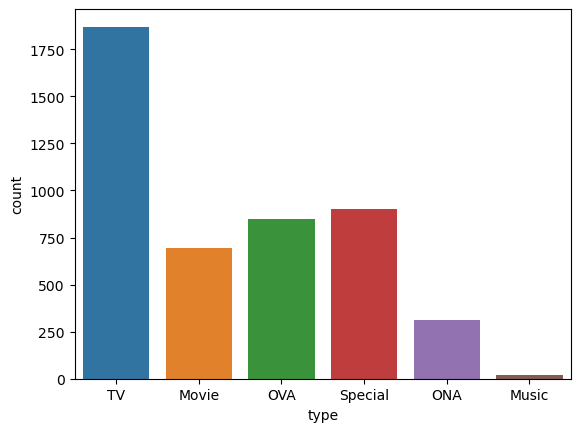

In [21]:
sb.countplot(x=temp.type[temp['COMEDY'] == 1])

<AxesSubplot:xlabel='type', ylabel='count'>

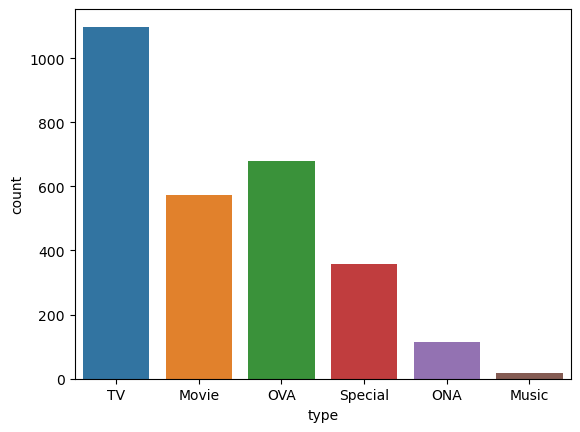

In [22]:
sb.countplot(x=temp.type[temp['ACTION'] == 1])

In [23]:
(len(anime.episodes[anime.episodes == 'Unknown']) / anime.episodes.shape[0] ) * 100

2.7655767040832924

In [3]:
episodes = anime.episodes.copy()
episodes.unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5',
       '21', '63', '52', '28', '145', '36', '69', '60', '178', '114',
       '35', '61', '34', '109', '20', '9', '49', '366', '97', '48', '78',
       '358', '155', '104', '113', '54', '167', '161', '42', '142', '31',
       '373', '220', '46', '195', '17', '1787', '73', '147', '127', '16',
       '19', '98', '150', '76', '53', '124', '29', '115', '224', '44',
       '58', '93', '154', '92', '67', '172', '86', '30', '276', '59',
       '72', '330', '41', '105', '128', '137', '56', '55', '65', '243',
       '193', '18', '191', '180', '91', '192', '66', '182', '32', '164',
       '100', '296', '694', '95', '68', '117', '151', '130',

In [4]:
episodes = episodes.replace('Unknown', 0).astype(np.int16)

<AxesSubplot:xlabel='episodes', ylabel='Density'>

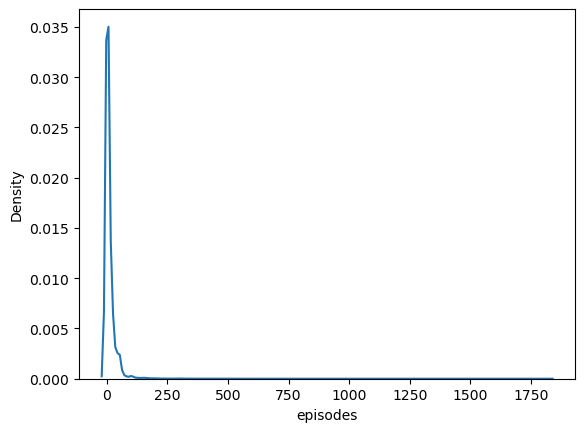

In [26]:
sb.kdeplot(episodes)

<AxesSubplot:xlabel='rating', ylabel='Density'>

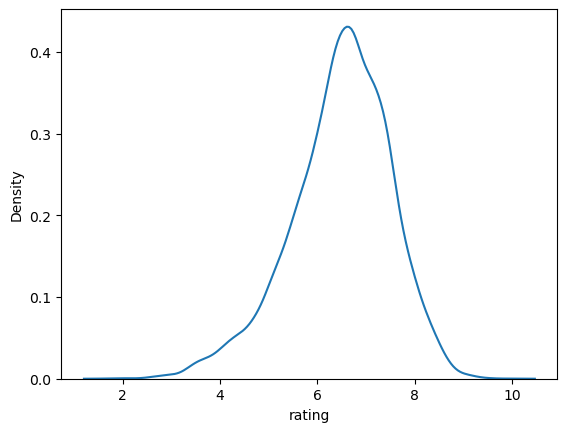

In [27]:
sb.kdeplot(anime.rating)

<AxesSubplot:xlabel='episodes', ylabel='rating'>

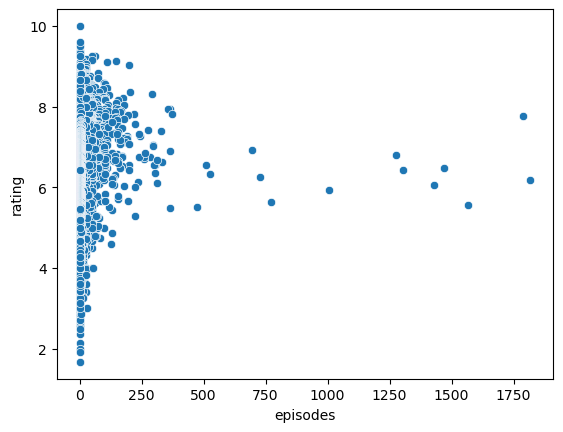

In [28]:
sb.scatterplot(x=episodes,y=anime.rating)

<AxesSubplot:xlabel='type', ylabel='rating'>

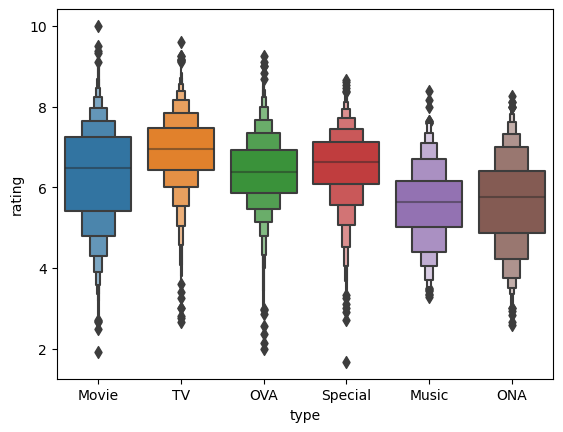

In [29]:
sb.boxenplot(x=anime.type, y=anime.rating)

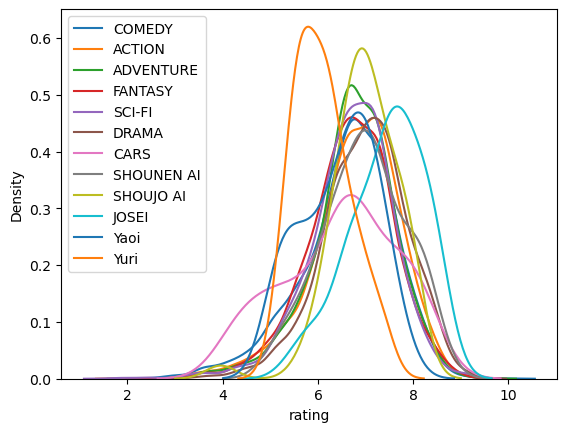

In [30]:
# top frequent
sb.kdeplot(x=anime.rating[temp['COMEDY'] == 1], label='COMEDY')
sb.kdeplot(x=anime.rating[temp['ACTION'] == 1], label='ACTION')
sb.kdeplot(x=anime.rating[temp['ADVENTURE'] == 1], label='ADVENTURE')
sb.kdeplot(x=anime.rating[temp['FANTASY'] == 1], label='FANTASY')
sb.kdeplot(x=anime.rating[temp['SCI-FI'] == 1], label='SCI-FI')
sb.kdeplot(x=anime.rating[temp['DRAMA'] == 1], label='DRAMA')
# less frequent
sb.kdeplot(x=anime.rating[temp['CARS'] == 1], label='CARS')
sb.kdeplot(x=anime.rating[temp['SHOUNEN AI'] == 1], label='SHOUNEN AI')
sb.kdeplot(x=anime.rating[temp['SHOUJO AI'] == 1], label='SHOUJO AI')
sb.kdeplot(x=anime.rating[temp['JOSEI'] == 1], label='JOSEI')
sb.kdeplot(x=anime.rating[temp['YAOI'] == 1], label='Yaoi')
sb.kdeplot(x=anime.rating[temp['YURI'] == 1], label='Yuri')

py.legend()

<AxesSubplot:xlabel='members', ylabel='Density'>

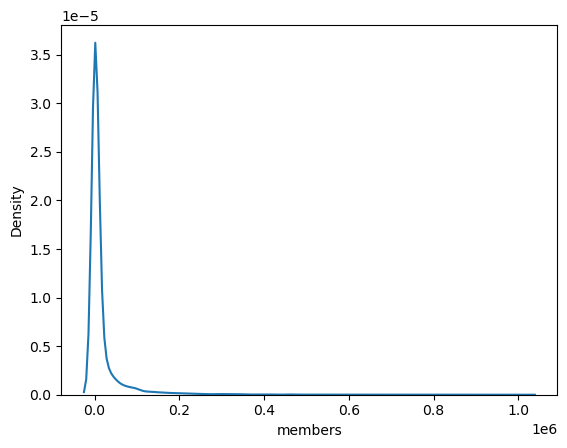

In [31]:
sb.kdeplot(x=anime.members)

<AxesSubplot:xlabel='type', ylabel='members'>

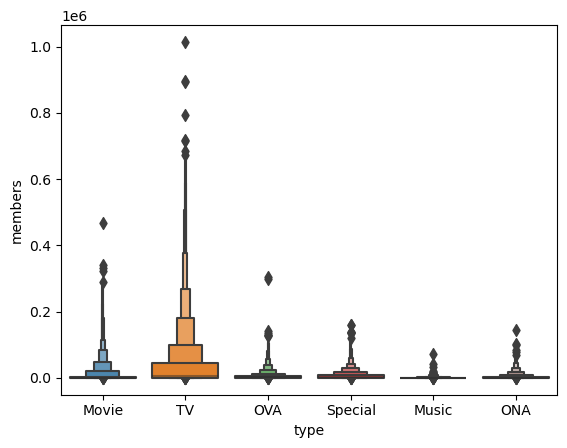

In [32]:
sb.boxenplot(x=anime.type, y=anime.members)

<AxesSubplot:xlabel='members', ylabel='rating'>

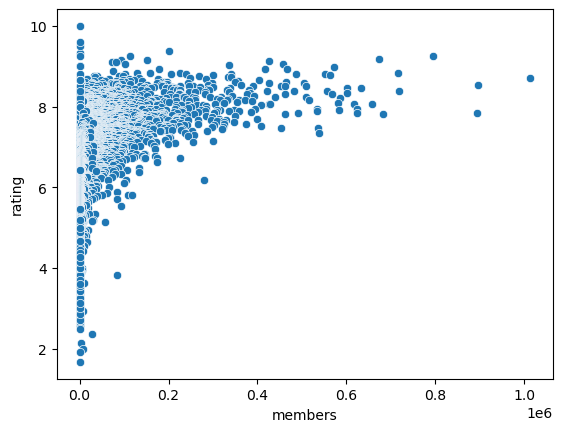

In [33]:
sb.scatterplot(x=anime.members, y=anime.rating)

In [5]:
anime.episodes = episodes

In [6]:
anime = anime[~ anime.type.isnull()]

In [9]:
genres = handle_genre(anime.genre)

Number of Unique Genres is 44


In [10]:
anime.columns

Index(['name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [11]:
testing = anime[anime.rating.isnull()]
anime = anime[~ anime.rating.isnull()]

In [12]:
titles = anime.name
titles.head(5)

anime_id
32281                      Kimi no Na wa.
5114     Fullmetal Alchemist: Brotherhood
28977                            Gintama°
9253                          Steins;Gate
9969                        Gintama&#039;
Name: name, dtype: object

In [13]:
anime.drop(['name', 'genre', 'members'], axis=1, inplace=True)

In [14]:
# handle name 
tf = TfidfVectorizer(stop_words='english')
vectorized_txt = tf.fit_transform(titles)

In [15]:
vectorized_txt.shape

(12269, 11975)

In [15]:
vectorized_txt = pd.DataFrame(vectorized_txt.toarray()).set_index(anime.index)

In [16]:
vectorized_txt.head(5)

,0,1,2,3,4,5,6,7,8,9,...,11847,11848,11849,11850,11851,11852,11853,11854,11855,11856
anime_id,,,,,,,,,,,,,,,,,,,,,
32281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
anime = pd.concat([anime, vectorized_txt], axis=1)

In [18]:
anime = pd.get_dummies(anime, columns=['type'], drop_first=True)

In [24]:
def similarity(dataset):
    return pd.DataFrame(data= cosine_similarity(dataset, dataset),
                        index= dataset.index, columns=dataset.index)

In [30]:
def recommend(item_id, similarity_matrix, titles, top=10):
    similarity =  similarity_matrix.loc[item_id].sort_values(ascending=False)[1:top+1]
    return pd.concat([titles.loc[similarity.index], similarity], axis=1)
    

In [19]:
anime.shape

(17803, 11982)

In [21]:
data = anime.iloc[:9900, :]

In [22]:
data.rating.isnull().sum()

0

In [25]:
sim = similarity(data)

In [27]:
sim.shape

(9900, 9900)

In [26]:
sim.loc[9969]

anime_id
32281    0.278562
5114     0.999109
28977    0.999933
9253     0.981419
9969     1.000000
           ...   
29635    0.381121
19559    0.332335
17903    0.593659
33414    0.639203
32073    0.387882
Name: 9969, Length: 9900, dtype: float64

In [32]:
titles.loc[9969]

'Gintama&#039;'

In [31]:
recommend(9969,sim, titles)

,name,9969
anime_id,,
28977,Gintama°,0.999933
2921,Ashita no Joe 2,0.999593
877,Nana,0.999591
5941,Cross Game,0.999581
2285,D.I.C.E.,0.999574
153,Juuni Kokuki,0.999570
5420,Kemono no Souja Erin,0.999567
407,Tantei Gakuen Q,0.999561
30230,Diamond no Ace: Second Season,0.999548


In [ ]:
data = pd.read_csv('/kaggle/input/anime-recommendations-database/rating.csv')#.set_index('anime_id')
data

In [ ]:
data.rating[(data.anime_id != 32281) & (data.rating != -1)].mean()